In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
df = pd.read_csv("autos.csv",encoding='latin-1')

In [3]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                  object
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
odometer               object
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [4]:
string_1 = "$5,000" 

In [5]:
string_1 = string_1.replace("$"," ").replace(",","")

In [6]:
string_1

' 5000'

In [7]:
df['price'] = df['price'].str.replace("$"," ").str.replace(",","").astype(int)

In [8]:
df['dateCrawled'].dtype

dtype('O')

In [9]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])

In [10]:
df['dateCrawled'][1] - df['dateCrawled'][0]

Timedelta('8 days 19:51:10')

In [11]:
today = dt.datetime.today()

In [12]:
today

datetime.datetime(2018, 12, 16, 14, 40, 34, 432115)

In [13]:
df['age'] = today -  df['dateCrawled']

In [14]:
df['age'] = df['age'].dt.days

In [15]:
df['age']

0         994
1         986
2         994
3        1008
4         989
5        1000
6        1000
7        1004
8         998
9        1005
10       1006
11       1004
12        989
13        998
14        998
15        989
16       1004
17        992
18        994
19       1004
20       1015
21       1014
22        992
23       1010
24        987
25        999
26        986
27        993
28       1001
29        988
         ... 
49970     999
49971     991
49972     994
49973     994
49974    1001
49975     993
49976    1001
49977     989
49978     986
49979    1000
49980    1009
49981    1006
49982     991
49983    1015
49984     989
49985     987
49986     985
49987     998
49988     992
49989    1009
49990     999
49991    1014
49992    1010
49993    1005
49994     998
49995     994
49996     993
49997     987
49998    1012
49999    1007
Name: age, Length: 50000, dtype: int64

In [16]:
df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5095
yearOfRegistration        0
gearbox                2680
powerPS                   0
model                  2758
odometer                  0
monthOfRegistration       0
fuelType               4482
brand                     0
notRepairedDamage      9829
dateCreated               0
nrOfPictures              0
postalCode                0
lastSeen                  0
age                       0
dtype: int64

In [17]:
df["vehicleType"].value_counts()

limousine     12859
kleinwagen    10822
kombi          9127
bus            4093
cabrio         3061
coupe          2537
suv            1986
andere          420
Name: vehicleType, dtype: int64

In [18]:
cols_to_be_dropped = ['dateCrawled','lastSeen','dateCreated']

In [19]:
df = df.drop(cols_to_be_dropped,1)

In [20]:
df['gearbox'].value_counts()

manuell      36993
automatik    10327
Name: gearbox, dtype: int64

In [21]:
df['seller'].describe()

count      50000
unique         2
top       privat
freq       49999
Name: seller, dtype: object

In [22]:
df['price'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

In [23]:
df['age'].value_counts()

986     1870
1000    1835
987     1825
999     1802
985     1771
1001    1763
991     1756
1006    1754
1013    1746
992     1728
1009    1727
988     1708
1012    1668
993     1644
998     1634
989     1633
1011    1626
1010    1618
990     1615
1005    1601
997     1586
994     1575
1004    1564
996     1524
995     1518
1008    1448
1015    1436
1003    1244
1007    1151
1002    1116
1014    1039
1016     171
983      154
984      150
Name: age, dtype: int64

In [24]:
df['odometer'] =df['odometer'].str.replace(',','').str.replace('km','')

In [25]:
df = df.rename(columns = {"odometer":"odometer_km"})

In [26]:
df = df[df['yearOfRegistration'] < 2019]

In [27]:
df["yearOfRegistration"].value_counts()

2000    3354
2005    3015
1999    3000
2004    2737
2003    2727
2006    2708
2001    2703
2002    2533
1998    2453
2007    2304
2008    2231
2009    2098
1997    2028
2011    1634
2010    1597
2017    1453
1996    1444
2012    1323
2016    1316
1995    1313
2013     806
2014     666
1994     660
2018     492
1993     445
2015     399
1990     395
1992     391
1991     356
1989     181
        ... 
1964      12
1910       9
1963       9
1959       7
1961       6
1956       5
1958       4
1962       4
1937       4
1950       3
1954       2
1955       2
1957       2
1951       2
1934       2
1800       2
1941       2
1927       1
1000       1
1111       1
1943       1
1939       1
1001       1
1929       1
1500       1
1948       1
1953       1
1938       1
1931       1
1952       1
Name: yearOfRegistration, Length: 85, dtype: int64

In [28]:
df.groupby(['brand'])['price'].sum().reset_index().sort_values('price', ascending= False)

,brand,price
20,mercedes_benz,139648797
38,volkswagen,68209850
2,bmw,44805097
1,audi,38399495
5,citroen,29902882
24,opel,27858972
10,ford,24720600
33,sonstige_autos,20903659
9,fiat,15871542
39,volvo,14482288


In [61]:
np.random.seed(43)
list_1 = np.random.randint(1952,2018,100).tolist()
list_2 = np.random.randint(100,401,100).tolist()

In [62]:
list_1[:5]

[2016, 2001, 1973, 2010, 1968]

In [64]:
len(list_2)

100

In [65]:
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [66]:
df = pd.read_csv('gapminder.csv')

In [67]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [68]:
gdp = df['GDP'].tolist()

In [70]:
life = df['life'].tolist()

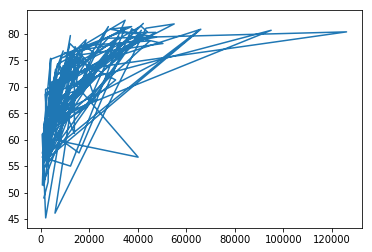

In [72]:
plt.plot(gdp,life)

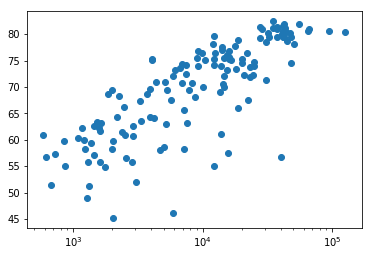

In [74]:
plt.xscale("log")
plt.scatter(gdp,life)

In [95]:
orig = pd.read_csv('StarWars.csv', encoding='latin-1')

In [104]:
orig.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [96]:
df = pd.read_csv("StarWars.csv",skiprows=1)

In [106]:
df.head()

,Response,Response.1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace.1,Star Wars: Episode II Attack of the Clones.1,...,Yoda,Response.2,Response.3,Response.4,Response.5,Response.6,Response.7,Response.8,Response.9,Response.10
3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [117]:
cols = list(orig.iloc[0])

In [111]:
# To get the Column names of a dataframe both the below methods works
# orig.columns.values.tolist()
# list(orig)
original_cols = list(orig)

In [112]:
original_cols

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

In [118]:
cols[1:9]

['Response',
 'Response',
 'Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi']

In [119]:
cols

[nan,
 'Response',
 'Response',
 'Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi',
 'Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi',
 'Han Solo',
 'Luke Skywalker',
 'Princess Leia Organa',
 'Anakin Skywalker',
 'Obi Wan Kenobi',
 'Emperor Palpatine',
 'Darth Vader',
 'Lando Calrissian',
 'Boba Fett',
 'C-3P0',
 'R2 D2',
 'Jar Jar Binks',
 'Padme Amidala',
 'Yoda',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response']

In [126]:
cols[15:]

['Han Solo',
 'Luke Skywalker',
 'Princess Leia Organa',
 'Anakin Skywalker',
 'Obi Wan Kenobi',
 'Emperor Palpatine',
 'Darth Vader',
 'Lando Calrissian',
 'Boba Fett',
 'C-3P0',
 'R2 D2',
 'Jar Jar Binks',
 'Padme Amidala',
 'Yoda',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response']

In [122]:
for x in range(1,15):
    original_cols[x] = cols[x]

In [124]:
original_cols

['RespondentID',
 'Response',
 'Response',
 'Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi',
 'Star Wars: Episode I  The Phantom Menace',
 'Star Wars: Episode II  Attack of the Clones',
 'Star Wars: Episode III  Revenge of the Sith',
 'Star Wars: Episode IV  A New Hope',
 'Star Wars: Episode V The Empire Strikes Back',
 'Star Wars: Episode VI Return of the Jedi',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do yo

In [127]:
for x in range(15,38):
    original_cols[x] = cols[x]

In [132]:
orig.columns = original_cols

In [135]:
len(original_cols)

38

In [138]:
for x in range(3,9):
    original_cols[x] += "watched"

In [141]:
for x in range(9,15):
    original_cols[x] += " rating"

In [142]:
original_cols

['RespondentID',
 'Response',
 'Response',
 'Star Wars: Episode I  The Phantom Menacewatched',
 'Star Wars: Episode II  Attack of the Cloneswatched',
 'Star Wars: Episode III  Revenge of the Sithwatched',
 'Star Wars: Episode IV  A New Hopewatched',
 'Star Wars: Episode V The Empire Strikes Backwatched',
 'Star Wars: Episode VI Return of the Jediwatched',
 'Star Wars: Episode I  The Phantom Menace rating',
 'Star Wars: Episode II  Attack of the Clones rating',
 'Star Wars: Episode III  Revenge of the Sith rating',
 'Star Wars: Episode IV  A New Hope rating',
 'Star Wars: Episode V The Empire Strikes Back rating',
 'Star Wars: Episode VI Return of the Jedi rating',
 'Han Solo',
 'Luke Skywalker',
 'Princess Leia Organa',
 'Anakin Skywalker',
 'Obi Wan Kenobi',
 'Emperor Palpatine',
 'Darth Vader',
 'Lando Calrissian',
 'Boba Fett',
 'C-3P0',
 'R2 D2',
 'Jar Jar Binks',
 'Padme Amidala',
 'Yoda',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 'Response',
 

In [144]:
orig.columns = original_cols

In [145]:
orig

,RespondentID,Response,Response,Star Wars: Episode I The Phantom Menacewatched,Star Wars: Episode II Attack of the Cloneswatched,Star Wars: Episode III Revenge of the Sithwatched,Star Wars: Episode IV A New Hopewatched,Star Wars: Episode V The Empire Strikes Backwatched,Star Wars: Episode VI Return of the Jediwatched,Star Wars: Episode I The Phantom Menace rating,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic


In [ ]:
#Writing the Data Frame to a Excel file in the same directory you are in
writer = pd.ExcelWriter("StarWars_Clean.xlsx")
orig.to_excel(writer,"Sheet1")
writer.save()